# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


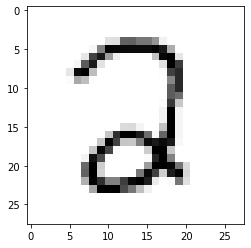

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2755458653686542
train accuracy is: 0.5315473209814722, test accuracy is 0.5297379032258065


Epoch 10 Loss 0.07604538595210827
train accuracy is: 0.9255549991654148, test accuracy is 0.9324596774193549


Epoch 20 Loss 0.04863847454648981
train accuracy is: 0.9481722583875813, test accuracy is 0.9561491935483871


Epoch 30 Loss 0.03931758817819855
train accuracy is: 0.956518110499082, test accuracy is 0.9642137096774194


Epoch 40 Loss 0.03456466127044582
train accuracy is: 0.9606910365548322, test accuracy is 0.9637096774193549


Epoch 50 Loss 0.03156472307302192
train accuracy is: 0.9636120847938574, test accuracy is 0.9652217741935484


Epoch 60 Loss 0.029450108243421237
train accuracy is: 0.9654481722583875, test accuracy is 0.9662298387096774


Epoch 70 Loss 0.027840575150982587
train accuracy is: 0.9680353864129527, test accuracy is 0.9662298387096774


Epoch 80 Loss 0.026543115768349352
train accuracy is: 0.9688699716241028, test accuracy is 0.9672379032258065


Epoch 90 Loss 0.025467752852815703
train accuracy is: 0.9697880153563679, test accuracy is 0.9682459677419355


Epoch 100 Loss 0.02454303714676873
train accuracy is: 0.971457185778668, test accuracy is 0.969758064516129


Epoch 110 Loss 0.0237138198010732
train accuracy is: 0.9725421465531631, test accuracy is 0.9692540322580645


Epoch 120 Loss 0.022982259600031824
train accuracy is: 0.9736271073276581, test accuracy is 0.9692540322580645


Epoch 130 Loss 0.02233295433023502
train accuracy is: 0.9746286095810383, test accuracy is 0.969758064516129


Epoch 140 Loss 0.021728003288137253
train accuracy is: 0.9752128192288433, test accuracy is 0.969758064516129


Epoch 150 Loss 0.021178751844472817
train accuracy is: 0.9757970288766483, test accuracy is 0.9702620967741935


Epoch 160 Loss 0.020650325567780944
train accuracy is: 0.9764646970455684, test accuracy is 0.9707661290322581


Epoch 170 Loss 0.020161310553331733
train accuracy is: 0.9772992822567184, test accuracy is 0.9707661290322581


Epoch 180 Loss 0.01969320731795009
train accuracy is: 0.9779669504256384, test accuracy is 0.9717741935483871


Epoch 190 Loss 0.019238860588050688
train accuracy is: 0.9784677015523285, test accuracy is 0.9717741935483871


Epoch 200 Loss 0.018812043546756727
train accuracy is: 0.9798864964112836, test accuracy is 0.9722782258064516


Epoch 210 Loss 0.018401067881377096
train accuracy is: 0.9801368719746286, test accuracy is 0.9727822580645161


Epoch 220 Loss 0.018009021874691968
train accuracy is: 0.9803872475379736, test accuracy is 0.9732862903225806


Epoch 230 Loss 0.017636830859984267
train accuracy is: 0.9809714571857787, test accuracy is 0.9732862903225806


Epoch 240 Loss 0.01727694179614973
train accuracy is: 0.9813052912702387, test accuracy is 0.9737903225806451


0.017037871478316213

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.275330359690319
train accuracy is: 0.528208980136872, test accuracy is 0.5241935483870968


Epoch 10 Loss 0.10581134292171662
train accuracy is: 0.9091136705057586, test accuracy is 0.9193548387096774


Epoch 20 Loss 0.07993833562478363
train accuracy is: 0.9292271740944751, test accuracy is 0.9390120967741935


Epoch 30 Loss 0.0684477019625976
train accuracy is: 0.9384076114171257, test accuracy is 0.9470766129032258


Epoch 40 Loss 0.0616492990740428
train accuracy is: 0.942330161909531, test accuracy is 0.9546370967741935


Epoch 50 Loss 0.05705570157622212
train accuracy is: 0.9451677516274412, test accuracy is 0.9546370967741935


Epoch 60 Loss 0.0537012292942802
train accuracy is: 0.9479218828242364, test accuracy is 0.9581653225806451


Epoch 70 Loss 0.05111975053025047
train accuracy is: 0.9495910532465365, test accuracy is 0.9581653225806451


Epoch 80 Loss 0.049057379244196696
train accuracy is: 0.9503421799365716, test accuracy is 0.9596774193548387


Epoch 90 Loss 0.0473604820459737
train accuracy is: 0.9520948088799867, test accuracy is 0.9611895161290323


Epoch 100 Loss 0.045932428114582285
train accuracy is: 0.9528459355700217, test accuracy is 0.9611895161290323


Epoch 110 Loss 0.044712264702179205
train accuracy is: 0.9539308963445168, test accuracy is 0.9627016129032258


Epoch 120 Loss 0.043650333522321824
train accuracy is: 0.9550993156401268, test accuracy is 0.9627016129032258


Epoch 130 Loss 0.04271700244903504
train accuracy is: 0.9555166082457018, test accuracy is 0.9627016129032258


Epoch 140 Loss 0.041887408812152485
train accuracy is: 0.956434651977967, test accuracy is 0.9632056451612904


Epoch 150 Loss 0.04114337192497468
train accuracy is: 0.956601569020197, test accuracy is 0.9637096774193549


Epoch 160 Loss 0.040470866762175345
train accuracy is: 0.957269237189117, test accuracy is 0.9652217741935484


Epoch 170 Loss 0.03985963732197418
train accuracy is: 0.9579369053580371, test accuracy is 0.9652217741935484


Epoch 180 Loss 0.039299860767271697
train accuracy is: 0.9584376564847271, test accuracy is 0.9657258064516129


Epoch 190 Loss 0.038785866385418255
train accuracy is: 0.9589384076114171, test accuracy is 0.9657258064516129


Epoch 200 Loss 0.03831065814497812
train accuracy is: 0.9593557002169921, test accuracy is 0.9662298387096774


Epoch 210 Loss 0.037869954216792616
train accuracy is: 0.9596060757803372, test accuracy is 0.9657258064516129


Epoch 220 Loss 0.03745842288405278
train accuracy is: 0.9600233683859122, test accuracy is 0.9667338709677419


Epoch 230 Loss 0.03707507267451032
train accuracy is: 0.9602737439492572, test accuracy is 0.9672379032258065


Epoch 240 Loss 0.03671521457345777
train accuracy is: 0.9606910365548322, test accuracy is 0.967741935483871


0.07141406866120434

### Comparing results of NN and LR

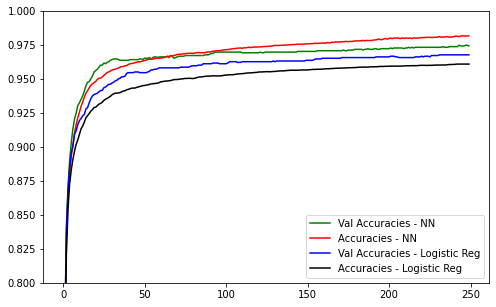

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

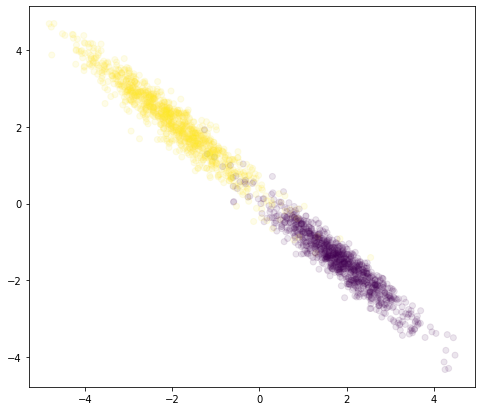

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

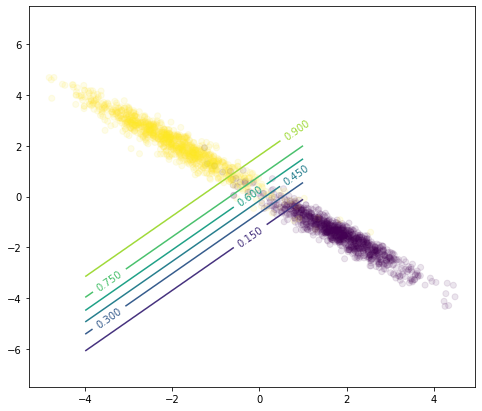

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );